In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Task 1: Configuration Space (40 points)**

### **A (10 pts) Visualize from the given data the workspace and the different rod configurations for each discretized orientation. Comment on the given discretized values for orientation.**

Available files:
['environment', 'rod']


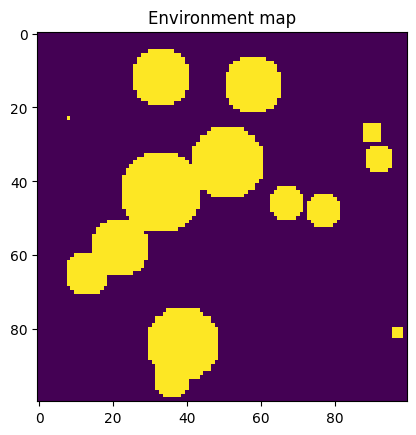

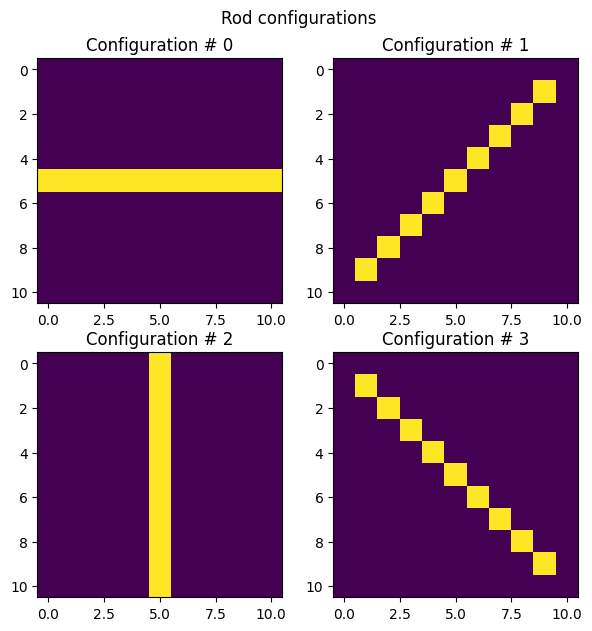

In [2]:
data = np.load('data_ps1.npz')
print("Available files:")
print(data.files)

plt.imshow(data['environment'], interpolation="None")
plt.title("Environment map")
plt.show()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7,7))
ax = ax.flatten()
for i in range(data['rod'].shape[2]):
    ax[i].imshow(data['rod'][:, :, i])
    ax[i].set_title(f"Configuration # {i}")
    
plt.suptitle("Rod configurations", y=0.95)
plt.show()

As can be seen above, only 4 configurations of rod angles $(0, \frac{\pi}{4}, \frac{\pi}{2}, \frac{3\pi}{4})$ are available to us. Meanwhile, the rod size in vertical and horizontal positions is 11 pixels, and in diagonal and anti-diagonal positions it is 9 pixels.

### **B (10 pts) Visualize the environment together with the object. For this, you may want to use the function ```plot_joint_environment``` from `utils.py` and select any valid configuration value for the rod.**

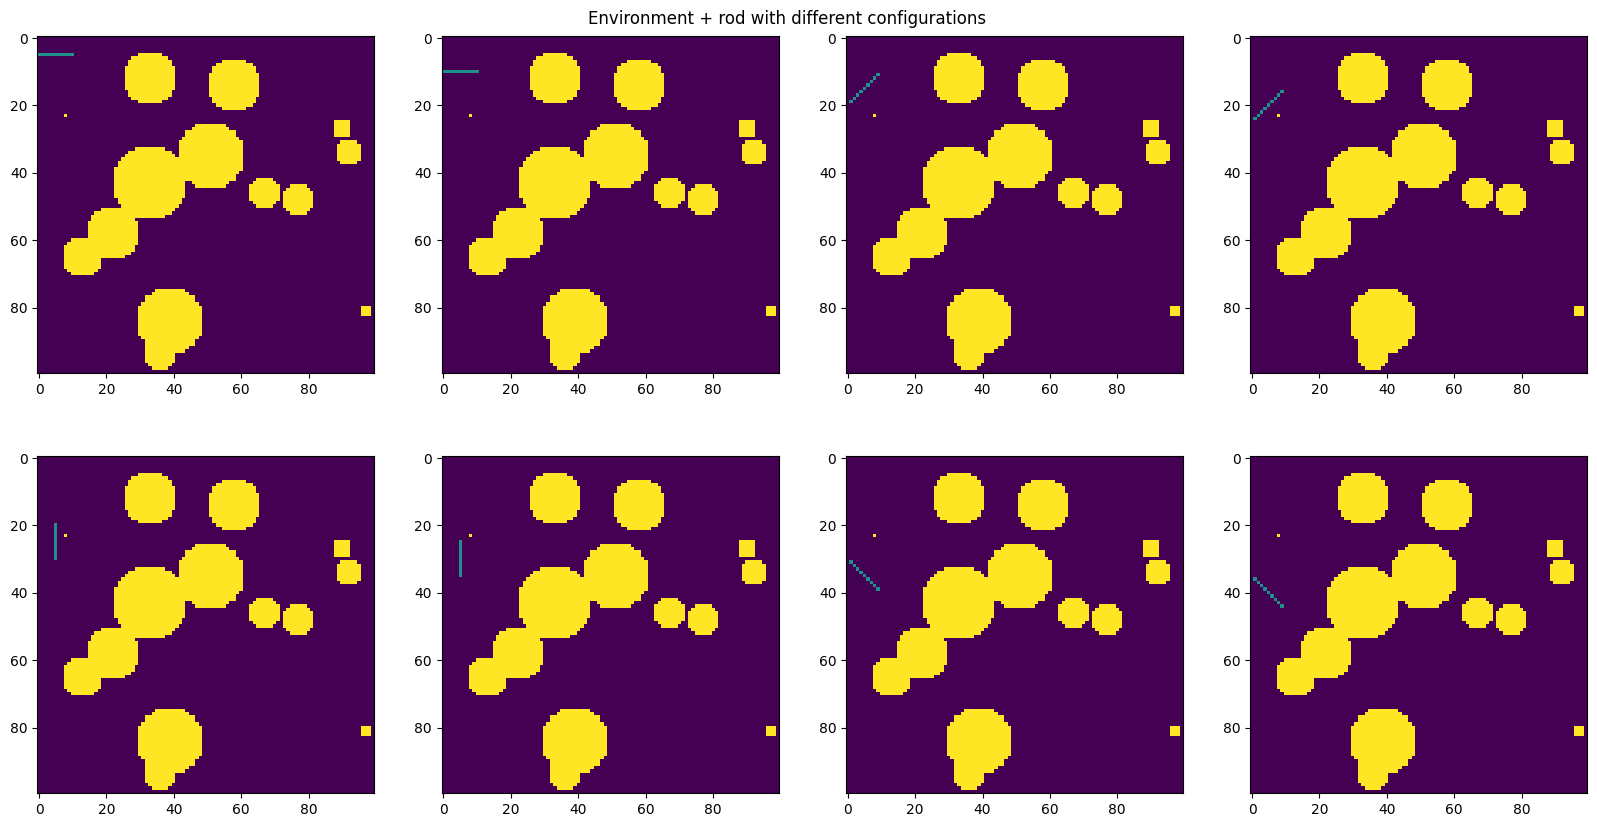

In [3]:
import utils

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
ax = ax.flatten()
for i in range(8):
    joint_pic = utils.plot_enviroment(img=data['environment'], obj=data['rod'], state=(5*(i+1), 5, i//2))
    ax[i].imshow(joint_pic, interpolation="None")
    
plt.suptitle("Environment + rod with different configurations", y=0.9)
plt.show()

### **C (10 pts) Create the C-space for the 2D environment map. For this, plot all the images corresponding to each of the orientations by using collision checking.**

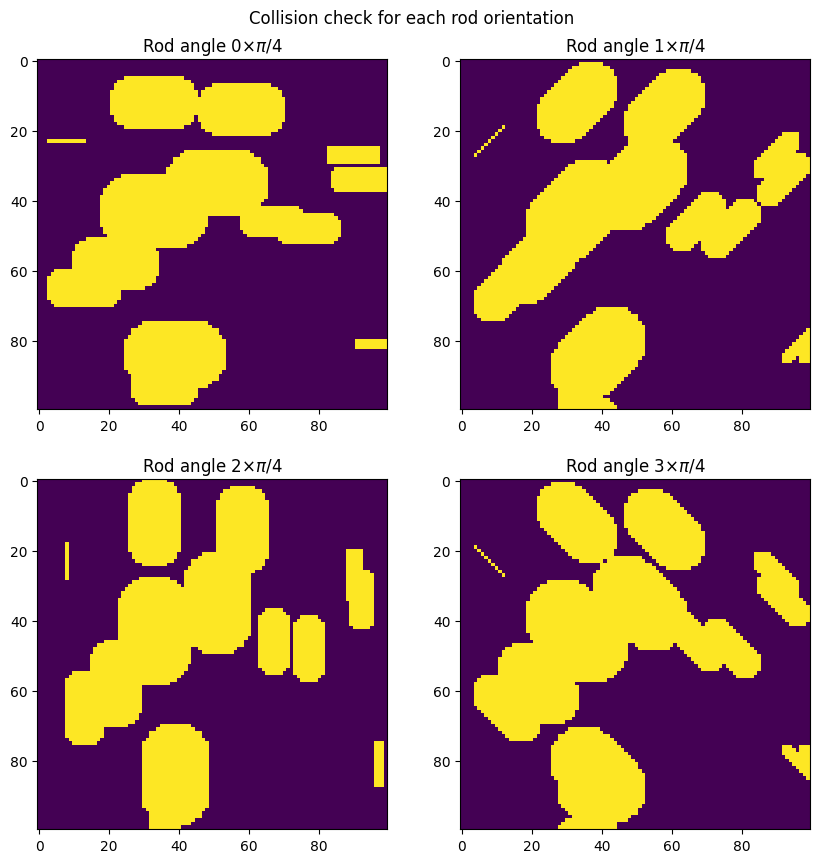

In [4]:
from scipy import signal

env_map = data['environment']
rod_data = data['rod']

# Collision checking
list_of_c_spaces = []
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax = ax.flatten()
for angle in range(rod_data.shape[2]):
    c_space = np.zeros(env_map.shape)
    rotated_rod = rod_data[:, :, angle]
    collision_check = signal.convolve2d(env_map, rotated_rod, boundary='symm', mode='same', fillvalue=1)
    c_space += collision_check

    #c_space = 1 - c_space
    c_space = utils.normalize_image(c_space)
    list_of_c_spaces.append(c_space)

    ax[angle].imshow(c_space, interpolation="None")
    ax[angle].set_title(rf"Rod angle {angle}$\times \pi/4$")

plt.suptitle("Collision check for each rod orientation", y=0.93)
plt.show()

# c_space = np.zeros(env_map.shape)
# for angle in range(rod_data.shape[2]):
#     rotated_rod = rod_data[:, :, angle]
#     collision_check = signal.convolve2d(env_map, rotated_rod, boundary='symm', mode='same', fillvalue=1)
#     c_space += collision_check

# #c_space = 1 - c_space
# c_space = utils.normalize_image(c_space)

# plt.imshow(c_space, interpolation="None")
# plt.title("Configuration space")
# plt.show()

### **D (10 pts) Comment on the obtained C-space with the previous method. What is the size of the C-space?**

* The obtained C-space using the `signal.convolve2d` represents the configuration space, which is a space of all possible configurations of the rod in the given environment. 

* In this case, the C-space is a 2D array with the same dimensions as the environment map, where each pixel represents a configuration of the rod. The size of the C-space is determined by the dimensions of the environment map, which is 100x100 in this scenario. 

* The C-space is used for path planning and collision detection. A value of 1 (yellow) in the C-space indicates that the corresponding configuration is a collision, while a value of 0 (violet) indicates that there is a collision-free. 

* By creating the C-space, we can efficiently plan paths for the rod by navigating through the collision-free configurations. 

# **Task 2: A star Algorithm (60 points)**

For this task, you will implement a graph search algorithm. The actions allowed in this problem are **moving up, down, left, right, rotate right, rotate left**. In total **6 actions**, each of them has an assigned a **cost of 1**.

### **A (40 pts) You need to implement the A star algorithm and plan in the generated discrete C-space from the previous task.**

* The starting configuration of the agent is (6,6,2) and the goal configuration is (55,55,0). 
* On this first iteration, use an heuristic function $h(q, q_G ) = 0$, which is equivalent to the Dijkstra algorithm.
* Save the result of calculated plan in rod_solve.mp4 using `plotting_result(environment,rod,plan)` from `utils.py`, where plan is list of rod states from start to goal.
* hint: Track the number of visited states to avoid/debug potential issues with internal loops.

In [5]:
# My custom class for this task
import cringe_utils

# Load the data
environment = data['environment']
rod = data['rod']

# Define start and goal states
start_state = (6, 6, 2)
goal_state = (55, 55, 0)

Heuristic: 0
Iteration: 11324

Algorithm completed successfully! ✅✅✅
Final cost: 87
States visited: 11324


Plan:
[(6, 6, 2), (7, 7, 2), (8, 8, 2), (9, 9, 2), (10, 10, 2), (11, 11, 2), (12, 12, 2), (13, 13, 2), (14, 14, 2), (15, 15, 2), (16, 16, 2), (17, 17, 2), (18, 18, 2), (19, 19, 2), (20, 20, 2), (21, 21, 2), (22, 22, 2), (23, 23, 2), (24, 24, 2), (25, 25, 2), (26, 26, 2), (26, 27, 2), (27, 28, 2), (27, 29, 2), (27, 30, 2), (27, 31, 2), (26, 32, 2), (25, 33, 2), (26, 34, 2), (25, 35, 2), (26, 36, 2), (25, 37, 2), (24, 38, 2), (23, 39, 2), (22, 40, 2), (21, 41, 2), (20, 42, 2), (20, 43, 2), (21, 44, 2), (21, 45, 2), (21, 45, 0), (22, 46, 0), (23, 47, 0), (23, 48, 0), (24, 49, 0), (24, 50, 0), (25, 51, 0), (24, 52, 0), (24, 53, 0), (24, 54, 0), (25, 55, 0), (24, 56, 0), (24, 57, 0), (24, 58, 0), (24, 59, 0), (25, 60, 0), (26, 61, 0), (27, 62, 0), (27, 62, 2), (28, 63, 2), (29, 63, 2), (30, 64, 2), (31, 63, 2), (32, 63, 2), (33, 63, 2), (34, 63, 2), (35, 62, 2), (36, 62, 2), (37, 61, 

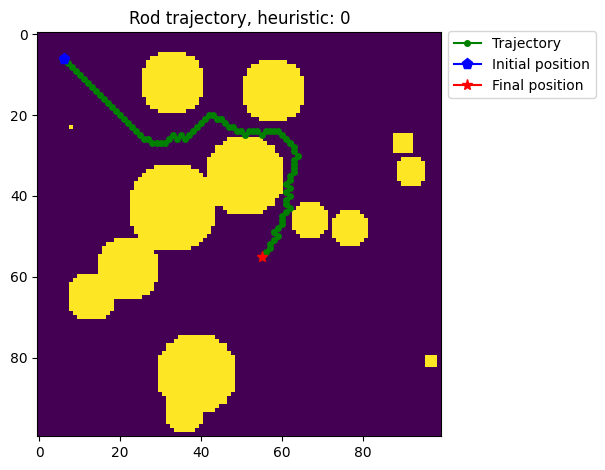

100%|██████████| 88/88 [00:00<00:00, 808.83it/s]
MovieWriter ffmpeg unavailable; using Pillow instead.


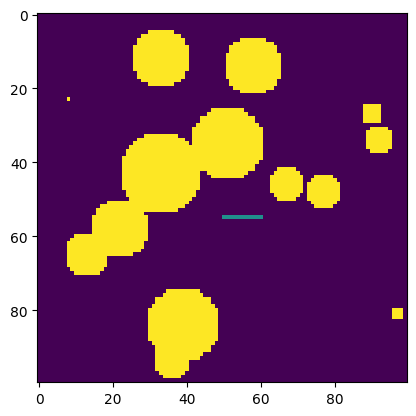

In [8]:
# Initialize A-star class and find the plan
''' Available heuristics: '0', 'L1', 'L2', 'custom', 'cosine', 'sine', 'oriented1', 'oriented2, 'random1', or 'random2' 🤗'''
super_class = cringe_utils.a_super_star(environment, rod, list_of_c_spaces, "0")
plan = super_class.a_star(start_state, goal_state)

# Plot the environment and the calculated plan
print("\n")
print("Plan:")
print(plan)

super_class.get_trajectory_plot(start_state, goal_state)
super_class.create_video()

### **B (10 pts) Change the heuristic function now to be $h(q, q_G ) = L_1$ norm of the $x$, $y$ components. Comment on the changes, how many states have been visited compared to Dijkstra? What is the final cost?**

Heuristic: L1
Iteration: 3733

Algorithm completed successfully! ✅✅✅
Final cost: 87
States visited: 3733


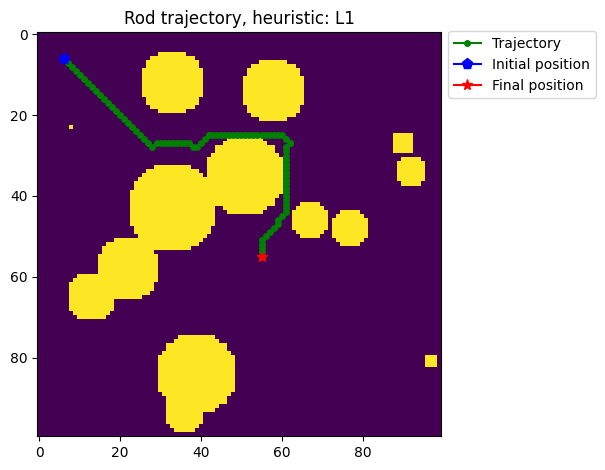

100%|██████████| 88/88 [00:00<00:00, 785.49it/s]
MovieWriter ffmpeg unavailable; using Pillow instead.


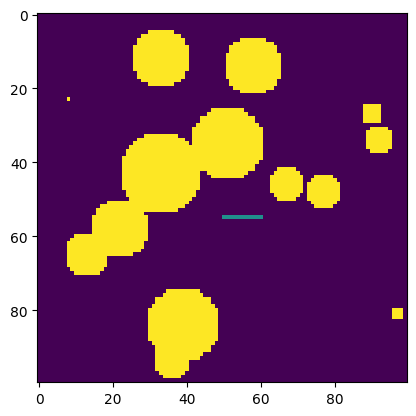

In [ ]:
super_class = cringe_utils.a_super_star(environment, rod, list_of_c_spaces, "L1")
plan = super_class.a_star(start_state, goal_state)

super_class.get_trajectory_plot(start_state, goal_state)
super_class.create_video()

As one can see from the figures above, A* with heuristic 0 gives us a final cost: 87 and visited states: 11324. At the same time, the $L_1$ heuristic gives us a final cost: 87 and visited states: 3733.
We get the same final cost, but for the $L_1$ norm (which is really good for problems on a discrete grid, because it provides total number of steps in each dimention) we have 303% fewer visited states to reach the final goal. The rod trajectory for the $L_1$ heuristic is more stable (with straight relatively long lines).

### **C (10 pts) Propose an heuristic function $h(q, q_G )$ that includes orientation. Compare metrics with the previous results. Comment on the results**

Heuristic: 0
Iteration: 11324

Algorithm completed successfully! ✅✅✅
Final cost: 87
States visited: 11324


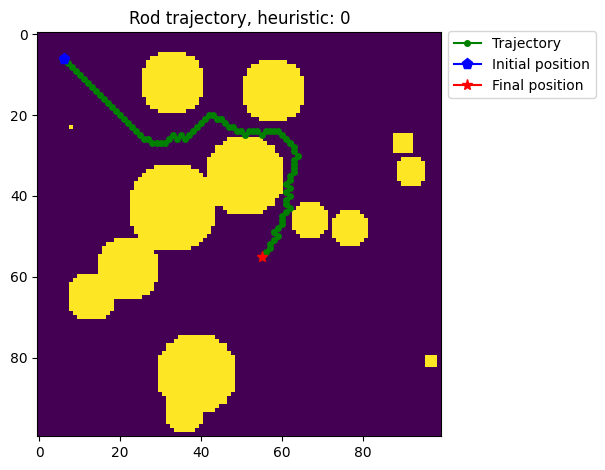

Heuristic: L1
Iteration: 3733

Algorithm completed successfully! ✅✅✅
Final cost: 87
States visited: 3733


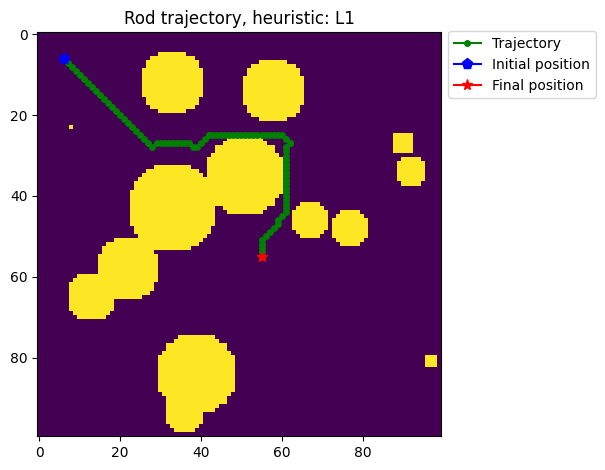

Heuristic: L2
Iteration: 4364

Algorithm completed successfully! ✅✅✅
Final cost: 87.0
States visited: 4364


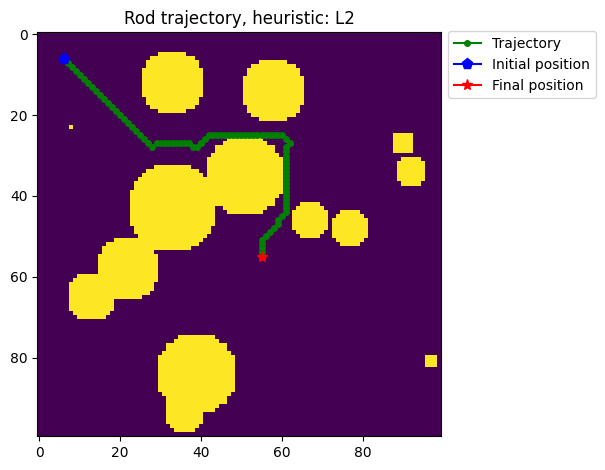

Heuristic: custom
Iteration: 4468

Algorithm completed successfully! ✅✅✅
Final cost: 87.0
States visited: 4468


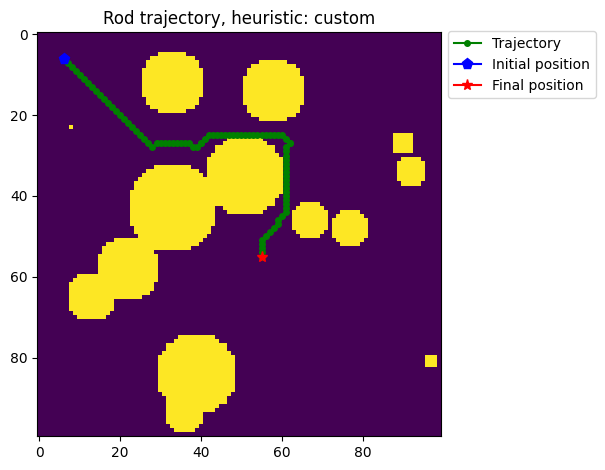

Heuristic: cosine
Iteration: 11329

Algorithm completed successfully! ✅✅✅
Final cost: 88.0
States visited: 11329


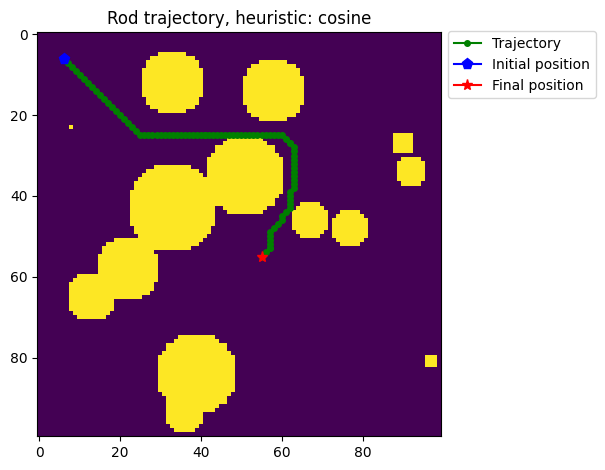

Heuristic: sine
Iteration: 11122

Algorithm completed successfully! ✅✅✅
Final cost: 87.0
States visited: 11122


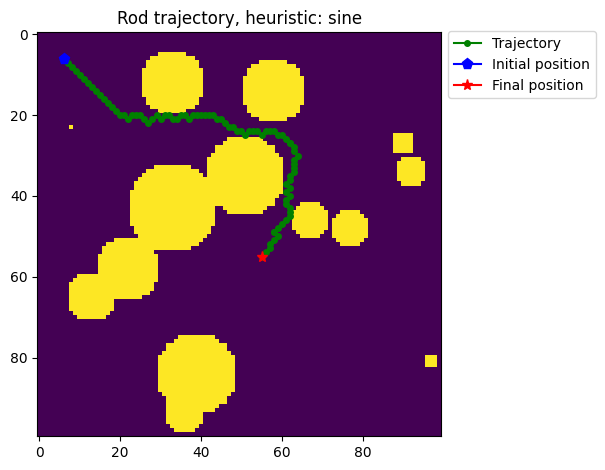

Heuristic: oriented1
Iteration: 5277

Algorithm completed successfully! ✅✅✅
Final cost: 88.0
States visited: 5277


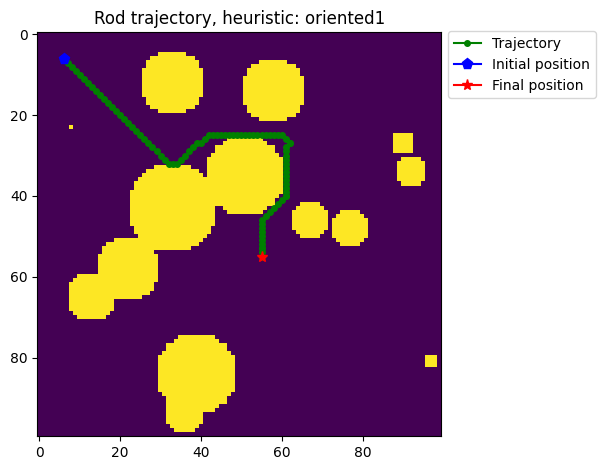

Heuristic: oriented2
Iteration: 4477

Algorithm completed successfully! ✅✅✅
Final cost: 87.0
States visited: 4477


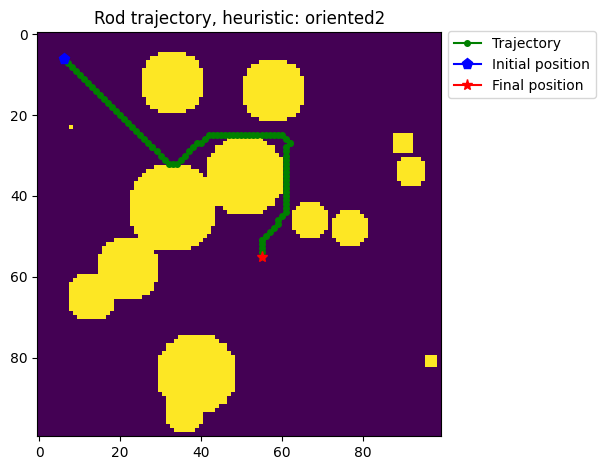

Heuristic: random1
Iteration: 11324

Algorithm completed successfully! ✅✅✅
Final cost: 129
States visited: 11324


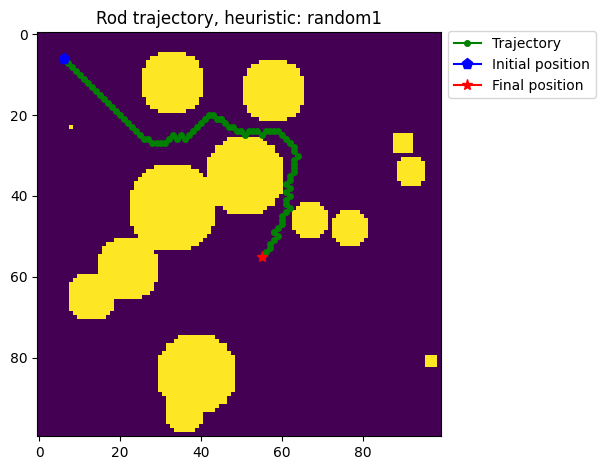

Heuristic: random2
Iteration: 11324

Algorithm completed successfully! ✅✅✅
Final cost: 754
States visited: 11324


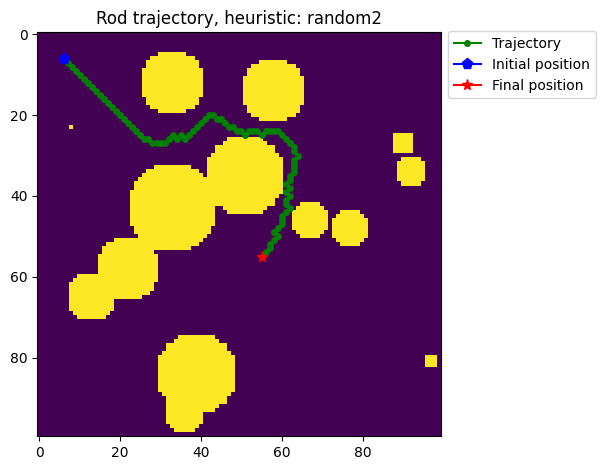

In [ ]:
# Initialize A-star class and find the plan
heuristics_list = ['0', 'L1', 'L2', 'custom', 'cosine', 'sine', 'oriented1', 'oriented2', 'random1', 'random2']
for heuristic in heuristics_list:
    super_class = cringe_utils.a_super_star(environment, rod, list_of_c_spaces, heuristic)
    plan = super_class.a_star(start_state, goal_state)
    super_class.get_trajectory_plot(start_state, goal_state)
    #super_class.create_video()

Heuristic functions that includes orientation: **oriented1** and **oriented2**.

* Heuristics oriented1:

    - Strengths:
        - Considers both the distance between positions and the angular distance, which allows for more accurate estimation of the cost of reaching a goal.
        - Uses cosine distance to estimate angles, which can be useful in tasks where angles play an important role.
    - Weaknesses:
        - Uses direct conditional operators to define a vector, which can be inefficient when there are a large number of conditions.
        - Does not take into account the possibility of rotating more than 180 degrees, which can lead to underestimating the cost of achieving the goal.
        

* Heuristics oriented2:

    - Strengths:
        - Accounts for both Euclidean distance between positions and angular distance, which allows for more accurate estimation of the cost of reaching a goal.
        - Uses the angle difference module and correctly handles cases of rotation greater than 180 degrees.
    - Weaknesses:
        - Uses fixed weights for distance and angular distance, which can lead to under- or overestimation of the cost of reaching a target depending on the specific task.
